In [1]:
!kaggle datasets download -d sbaghbidi/human-faces-object-detection

Dataset URL: https://www.kaggle.com/datasets/sbaghbidi/human-faces-object-detection
License(s): unknown
 97% 484M/498M [00:06<00:00, 117MB/s]
100% 498M/498M [00:06<00:00, 78.7MB/s]


In [2]:
!unzip /content/human-faces-object-detection.zip

Archive:  /content/human-faces-object-detection.zip
  inflating: faces.csv               
  inflating: images/00000003.jpg     
  inflating: images/00000004.jpg     
  inflating: images/00000005.jpg     
  inflating: images/00000006.jpg     
  inflating: images/00000008.jpg     
  inflating: images/00000011.jpg     
  inflating: images/00000012.jpg     
  inflating: images/00000015.jpg     
  inflating: images/00000018.jpg     
  inflating: images/00000020.jpg     
  inflating: images/00000022.jpg     
  inflating: images/00000023.jpg     
  inflating: images/00000024.jpg     
  inflating: images/00000026.jpg     
  inflating: images/00000031.jpg     
  inflating: images/00000032.jpg     
  inflating: images/00000041.jpg     
  inflating: images/00000044.jpg     
  inflating: images/00000045.jpg     
  inflating: images/00000047.jpg     
  inflating: images/00000050.jpg     
  inflating: images/00000051.jpg     
  inflating: images/00000055.jpg     
  inflating: images/00000058.jpg    

In [4]:
import pandas as pd
df=pd.read_csv('/content/faces.csv')
df.head()

image_name  width  height   x0   y0    x1   y1
0  00001722.jpg   1333    2000  490  320   687  664
1  00001044.jpg   2000    1333  791  119  1200  436
2  00001050.jpg    667    1000  304  155   407  331
3  00001736.jpg    626     417  147   14   519  303
4  00003121.jpg    626     418  462   60   599  166

In [5]:
import pandas as pd
import os
class_id = 0

output_dir = '/content/labels'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

def convert_to_yolo(row):
    # Calculate center coordinates
    x_center = (row['x0'] + row['x1']) / 2.0
    y_center = (row['y0'] + row['y1']) / 2.0

    # Calculate box width and height
    box_width = row['x1'] - row['x0']
    box_height = row['y1'] - row['y0']

    # Normalize the coordinates
    x_center /= row['width']
    y_center /= row['height']
    box_width /= row['width']
    box_height /= row['height']

    return f"{class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"

# Apply the conversion to each row and save to a .txt file
for i, row in df.iterrows():
    yolo_annotation = convert_to_yolo(row)

    # Get the image name without extension and create the corresponding .txt file
    image_name = os.path.splitext(row['image_name'])[0]
    output_file = os.path.join(output_dir, image_name + '.txt')

    # Write the YOLO formatted annotation to the file
    with open(output_file, 'w') as f:
        f.write(yolo_annotation + '\n')

    print(f"Saved YOLO annotation to {output_file}")


Saved YOLO annotation to /content/labels/00001722.txt
Saved YOLO annotation to /content/labels/00001044.txt
Saved YOLO annotation to /content/labels/00001050.txt
Saved YOLO annotation to /content/labels/00001736.txt
Saved YOLO annotation to /content/labels/00003121.txt
Saved YOLO annotation to /content/labels/00003121.txt
Saved YOLO annotation to /content/labels/00003121.txt
Saved YOLO annotation to /content/labels/00003121.txt
Saved YOLO annotation to /content/labels/00003121.txt
Saved YOLO annotation to /content/labels/00000400.txt
Saved YOLO annotation to /content/labels/00002571.txt
Saved YOLO annotation to /content/labels/00002571.txt
Saved YOLO annotation to /content/labels/00000366.txt
Saved YOLO annotation to /content/labels/00000366.txt
Saved YOLO annotation to /content/labels/00002565.txt
Saved YOLO annotation to /content/labels/00001939.txt
Saved YOLO annotation to /content/labels/00001087.txt
Saved YOLO annotation to /content/labels/00001093.txt
Saved YOLO annotation to /co

In [7]:
import os
import shutil
import random
from glob import glob

# Paths to the images and annotations directories
images_dir = '/content/images'
annotations_dir = '/content/labels'

# Output directories
train_images_dir = '/content/faces/train/images'
train_annotations_dir = '/content/faces/train/labels'
val_images_dir = '/content/faces/test/images'
val_annotations_dir = '/content/faces/test/labels'

# Create the output directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_annotations_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_annotations_dir, exist_ok=True)

# Get a list of all image files
image_files = glob(os.path.join(images_dir, '*.jpg'))  # or '*.png' depending on your image format

# Shuffle the list of image files
random.shuffle(image_files)

# Split the data: 80% training, 20% validation
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Helper function to move corresponding annotation files
def move_files(file_list, target_image_dir, target_annotation_dir):
    for image_file in file_list:
        # Get the base name of the file (without extension)
        base_name = os.path.basename(image_file).split('.')[0]

        # Define the corresponding annotation file
        annotation_file = os.path.join(annotations_dir, base_name + '.txt')

        # Move the image and annotation files to the respective directories
        shutil.copy(image_file, target_image_dir)
        shutil.copy(annotation_file, target_annotation_dir)

# Move the training files
move_files(train_files, train_images_dir, train_annotations_dir)

# Move the validation files
move_files(val_files, val_images_dir, val_annotations_dir)

print(f"Training files: {len(train_files)}")
print(f"Validation files: {len(val_files)}")


Training files: 1763
Validation files: 441


In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 30.0 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
model.train(data='/content/data.yaml',epochs=20)

100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/faces/train/labels... 1763 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1763/1763 [00:00<00:00, 2240.23it/s]


train: New cache created: /content/faces/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/faces/test/labels... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [00:00<00:00, 1485.11it/s]


val: New cache created: /content/faces/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.31G       1.63      2.563      1.672          7        640: 100%|██████████| 111/111 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]


                   all        441        441      0.448      0.533      0.428       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.19G      1.538      1.982      1.592          6        640: 100%|██████████| 111/111 [00:47<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]

                   all        441        441      0.522      0.583       0.53      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.19G      1.489      1.749      1.572          4        640: 100%|██████████| 111/111 [00:43<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        441      0.514      0.578      0.549      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.19G      1.488      1.596      1.588          5        640: 100%|██████████| 111/111 [00:41<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        441        441      0.483      0.622      0.523      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.19G      1.443      1.501      1.539          6        640: 100%|██████████| 111/111 [00:43<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]

                   all        441        441      0.699      0.717      0.764      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.17G      1.381      1.384      1.488          7        640: 100%|██████████| 111/111 [00:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]

                   all        441        441      0.669      0.696      0.713      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.18G      1.351      1.317      1.473          7        640: 100%|██████████| 111/111 [00:45<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.87it/s]

                   all        441        441      0.713      0.688      0.781      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.18G      1.346      1.309      1.483          5        640: 100%|██████████| 111/111 [00:44<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.17it/s]

                   all        441        441        0.8      0.741      0.839      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.18G      1.281      1.232      1.435          7        640: 100%|██████████| 111/111 [00:42<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        441        441      0.804      0.719      0.834      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.17G      1.257      1.231      1.412          6        640: 100%|██████████| 111/111 [00:42<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]

                   all        441        441      0.856      0.717      0.856      0.544


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.25G      1.174      1.019      1.384          3        640: 100%|██████████| 111/111 [00:50<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        441        441      0.807       0.76      0.862       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.18G      1.148     0.9306      1.378          3        640: 100%|██████████| 111/111 [00:43<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]

                   all        441        441      0.856      0.766      0.894      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.18G      1.119     0.9046      1.364          3        640: 100%|██████████| 111/111 [00:41<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        441        441      0.881      0.785      0.914      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.17G      1.084      0.867      1.335          3        640: 100%|██████████| 111/111 [00:42<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]

                   all        441        441      0.903       0.78      0.916      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.18G      1.045     0.8268      1.314          3        640: 100%|██████████| 111/111 [00:45<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.93it/s]

                   all        441        441      0.853      0.753      0.875      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.18G     0.9972     0.7797       1.27          3        640: 100%|██████████| 111/111 [00:46<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        441        441      0.878      0.803      0.919      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.18G     0.9857     0.7822      1.265          3        640: 100%|██████████| 111/111 [00:41<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.72it/s]

                   all        441        441      0.906      0.764      0.922      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.17G     0.9518     0.7474      1.237          3        640: 100%|██████████| 111/111 [00:44<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.95it/s]

                   all        441        441       0.91      0.805      0.931      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.18G     0.9349     0.7079      1.217          3        640: 100%|██████████| 111/111 [00:42<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.76it/s]

                   all        441        441      0.893      0.798      0.931      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.18G     0.8982     0.7028      1.199          3        640: 100%|██████████| 111/111 [00:41<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.77it/s]

                   all        441        441      0.887      0.816      0.935       0.67



20 epochs completed in 0.288 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]


                   all        441        441      0.887      0.816      0.935       0.67
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c88f726cca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

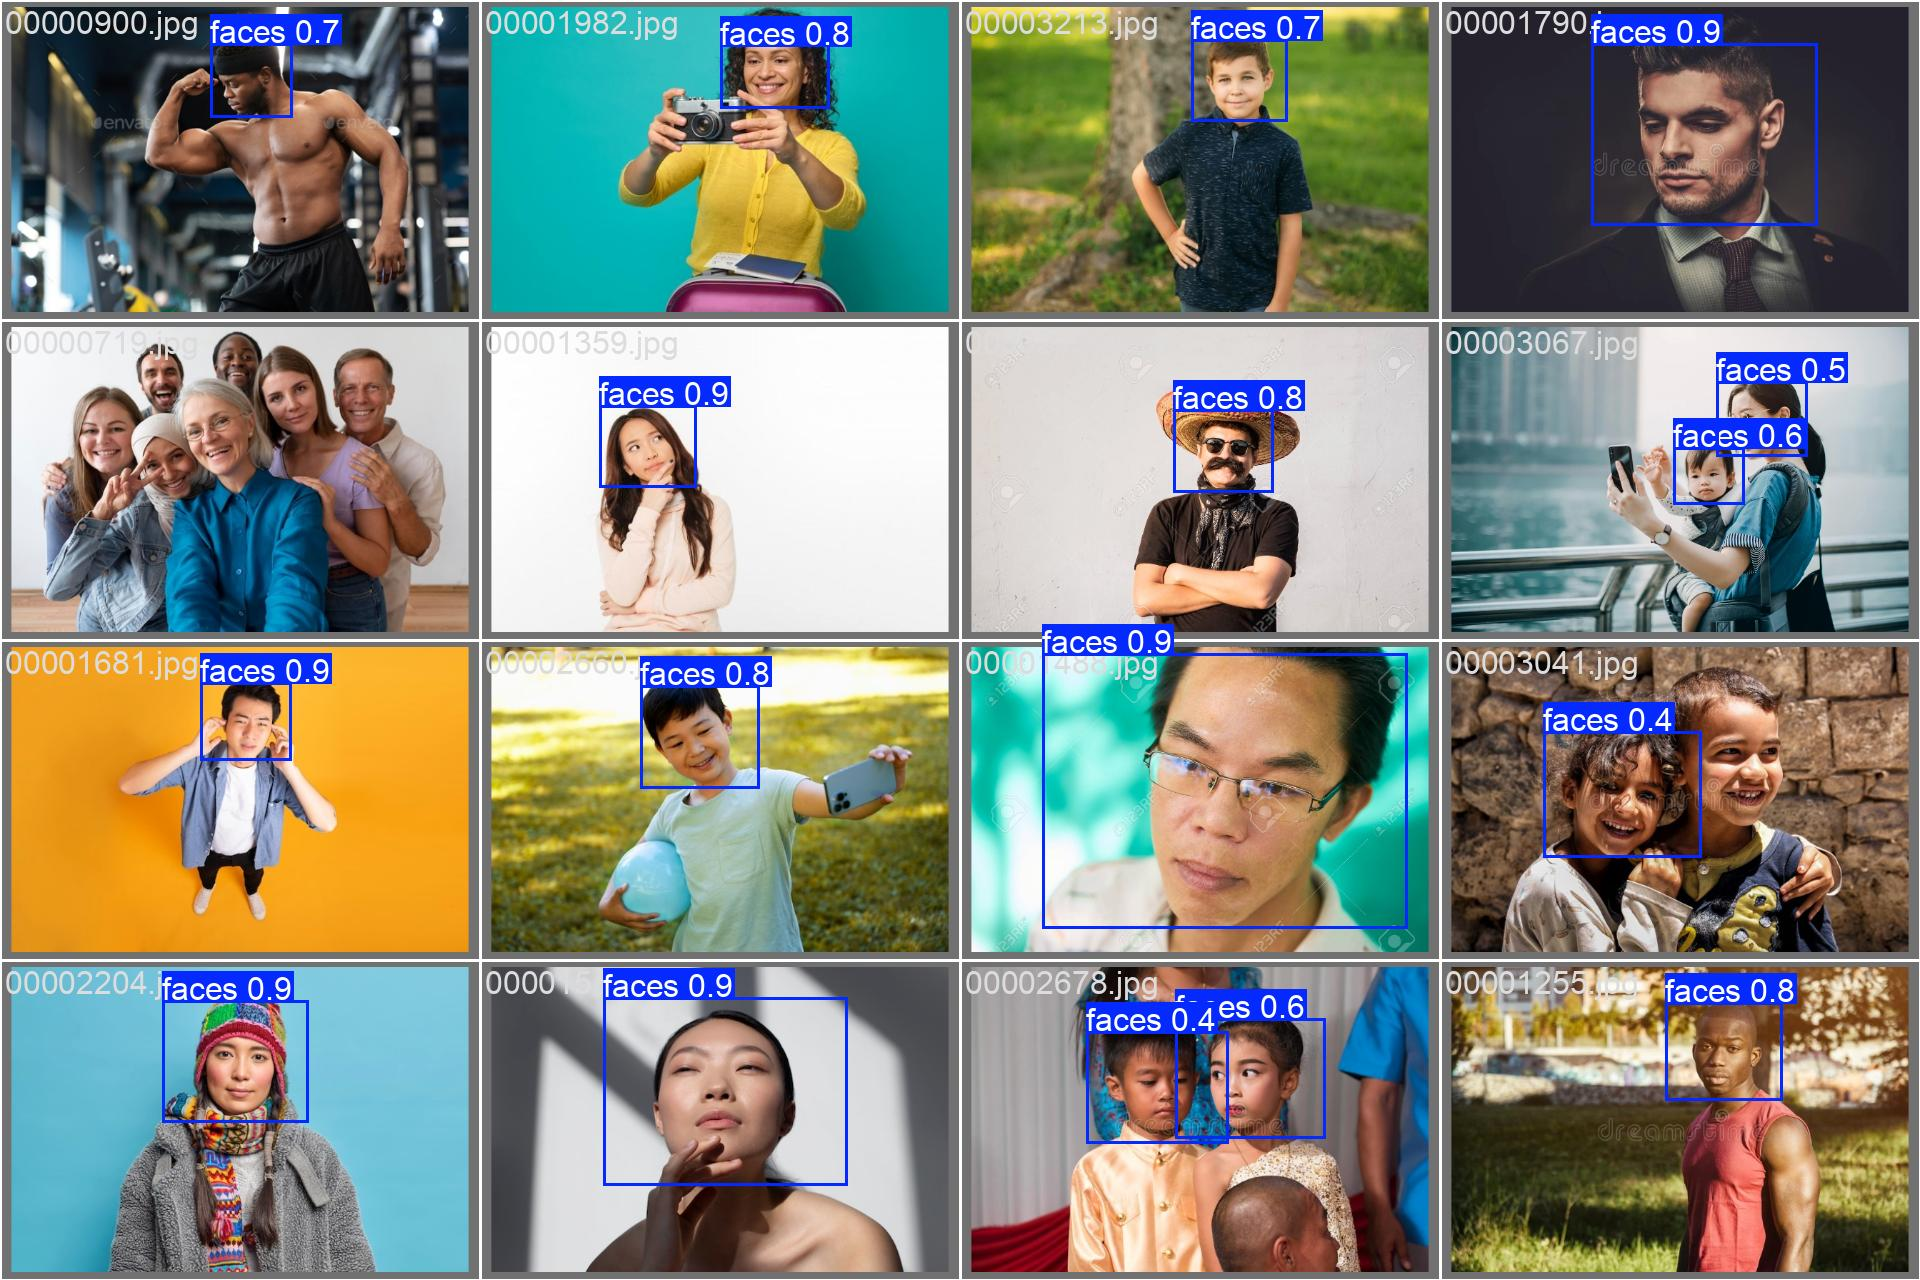

In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img=cv.imread('/content/runs/detect/train/val_batch2_pred.jpg')
cv2_imshow(img)

In [23]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model("https://youtu.be/xLFCcnYSCyE?si=xRC7_YRIP2pIjBk-",stream=True)


In [34]:
model.predict("https://youtube.com/shorts/3oXgQ4YOvLY?si=0hknWFVznP1455_O",save=True)


1/1: https://youtube.com/shorts/3oXgQ4YOvLY?si=0hknWFVznP1455_O... Success ✅ (1632 frames of shape 1080x1920 at 60.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 640x384 1 faces, 751.0ms
0: 640x384 1 faces, 15.7ms
0: 640x384 1 faces, 29.4ms
0: 640x384 1 faces, 23.4ms
0: 640x384 1 faces, 20.5ms
0: 640x384 1 faces, 19.2ms
0: 640x384 1 faces, 19.1ms
0: 640x384 1 faces, 20.1ms
0: 640x384 1 faces, 14.8ms
0: 640x384 1 faces, 40.4ms
0: 640x384 1 faces, 85.1ms
0: 640x384 1 faces, 11.4ms
0: 640x

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'faces'}
 obb: None
 orig_img: array([[[47, 30, 12],
         [47, 30, 12],
         [47, 30, 12],
         ...,
         [41, 28, 17],
         [41, 28, 17],
         [41, 28, 17]],
 
        [[47, 30, 12],
         [47, 30, 12],
         [47, 30, 12],
         ...,
         [41, 28, 17],
         [41, 28, 17],
         [41, 28, 17]],
 
        [[47, 30, 12],
         [47, 30, 12],
         [47, 30, 12],
         ...,
         [41, 28, 17],
         [41, 28, 17],
         [41, 28, 17]],
 
        ...,
 
        [[ 0,  0, 12],
         [ 0,  0, 12],
         [ 0,  0, 12],
         ...,
         [50, 62, 74],
         [45, 57, 69],
         [45, 57, 69]],
 
        [[ 0,  0, 12],
         [ 0,  0, 12],
         [ 0,  0, 12],
         ...,
         [50, 62, 74],
         [45, 57, 69],
         [45, 57, 69]],
 
        [[ 0,  0, 12],
     

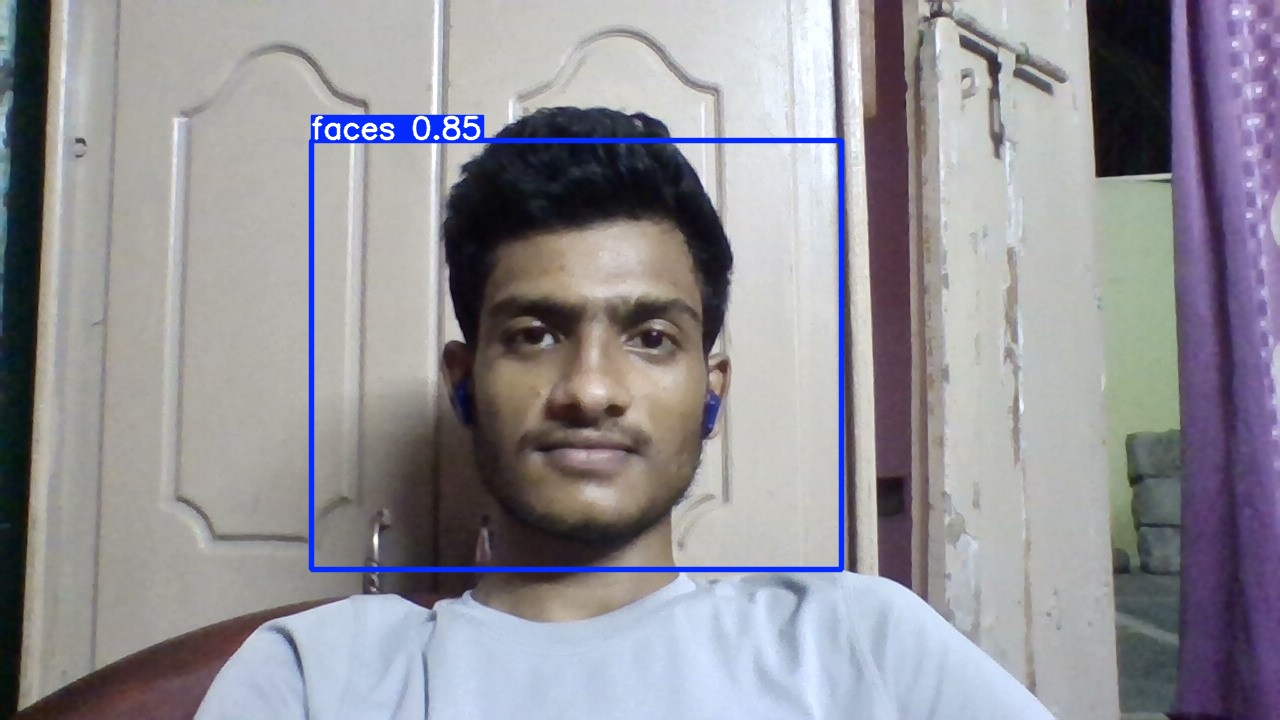

In [19]:
results=cv.imread('/content/result_0.jpg')
cv2_imshow(results)

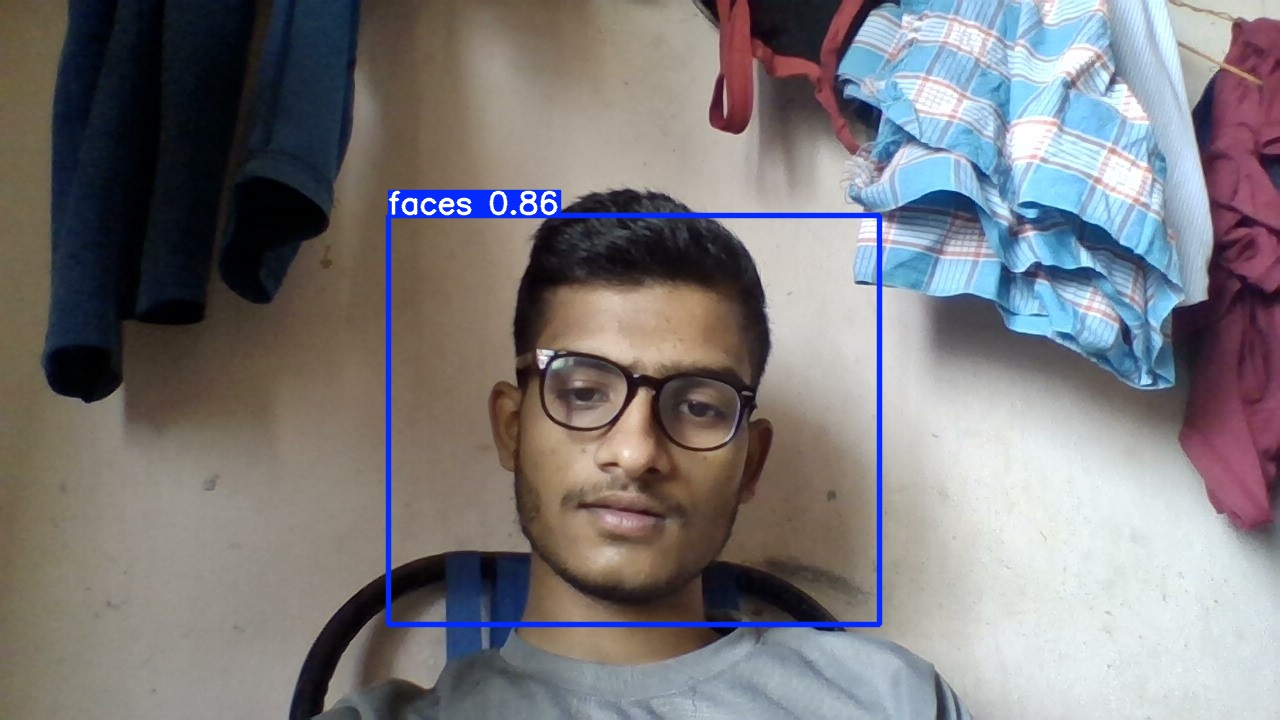

In [20]:
results=cv.imread('/content/result_1.jpg')
cv2_imshow(results)

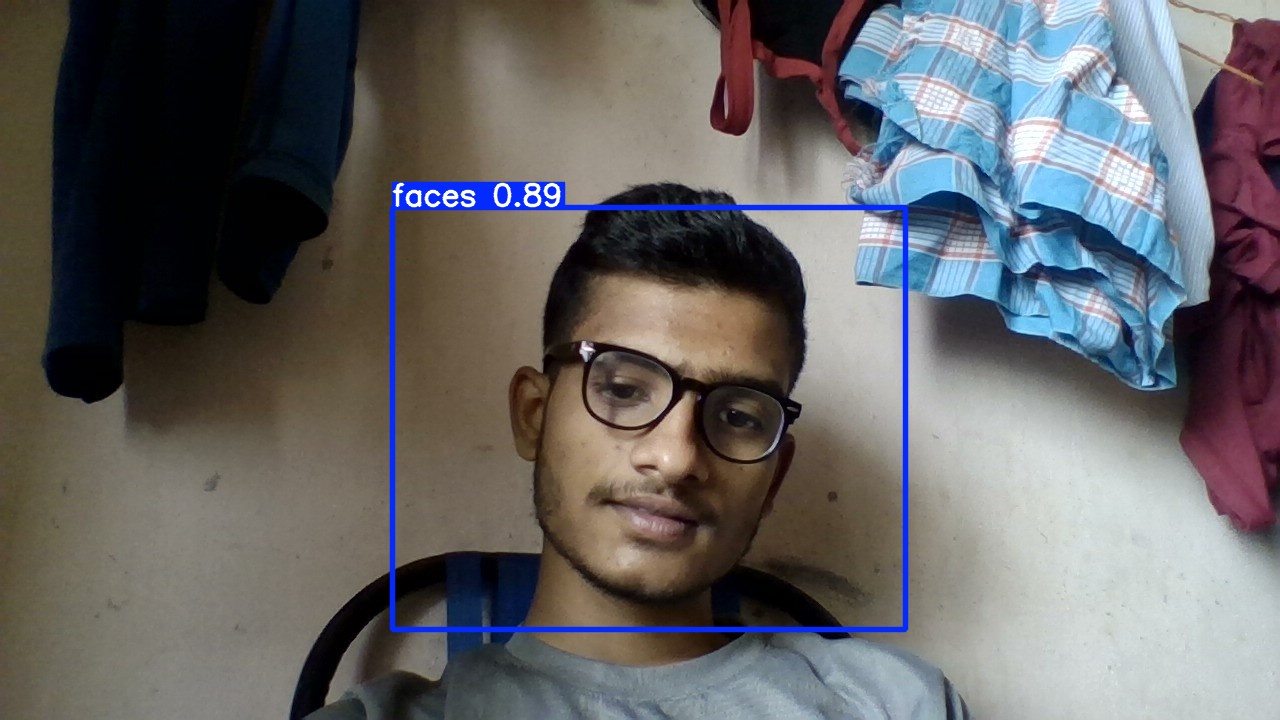

In [35]:
results=cv.imread('/content/result_2.jpg')
cv2_imshow(results)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to your uploaded or Google Drive video file
video_path = '/content/runs/detect/predict/3oXgQ4YOvLY_si_0hknWFVznP1455_O.avi'  # Change this to the actual path of your video

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Read until the video is completed
    while cap.isOpened():
        # Capture frame-by-frame
        ret, frame = cap.read()

        # If a frame was successfully read, ret will be True
        if ret:
            # Convert the frame from BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the frame using matplotlib
            plt.imshow(frame_rgb)
            plt.axis('off')  # Turn off axes for a clean display
            plt.show()

            # Optional: Add a delay between frames if you want to simulate video playback (in seconds)
            plt.pause(0.01)  # Adjust pause time for slower or faster playback

        else:
            # If no frame is read (end of video), exit the loop
            break

# Release the video capture object
cap.release()
